In [3]:
# Importacoes das Bibliotecas

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import zipfile
#import kaggle

# id e senha kaggle pelo os
# os.environ['KAGGLE_USERNAME'] = 'kaggle username'
# os.environ['KAGGLE_KEY'] = 'kaggle key'

In [ ]:
# Importar database netflix-shows do Kaggle
!kaggle datasets download -d shivamb/netflix-shows

In [ ]:
# Extrair o arquivo do .zip baixado
zipfile_name = 'netflix-shows.zip'
with zipfile.ZipFile(zipfile_name, 'r') as file:
    file.extractall()

In [4]:
# Ler o csv para um DataFrame do Pandas
raw_data = pd.read_csv('netflix_titles.csv')

In [5]:
# Explorar o arquivo
raw_data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [6]:
# Linhas e colunas
raw_data.shape

(8807, 12)

In [7]:
# Objetivo inicial:
## Qual tipo de conteúdo o Brasil mais produziu, ou participou na produçao, para a Netflix?
## Qual a progressão da produção de conteúdo brasileiro ao longo do tempo?

# Que tipo de informação precisamos?
## Shows que possuam 'Brazil' listado em 'coutry'

# Colunas necessárias:
## country, listed_in

In [8]:
# Alguns valores possuem uma lista de países.
raw_data['country'].value_counts()

United States                             2818
India                                      972
United Kingdom                             419
Japan                                      245
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: country, Length: 748, dtype: int64

In [9]:
# Mostra inicialmente 77 linhas, mas é possivel que esteja ignorando as listas
raw_data.query('country == "Brazil"')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
302,s303,Movie,City of God: 10 Years Later,"Cavi Borges, Luciano Vidigal",NaN,Brazil,"August 5, 2021",2013,TV-MA,69 min,"Documentaries, International Movies","A decade after the seminal Brazilian film ""Cit..."
650,s651,Movie,O Vendedor de Sonhos,Jayme Monjardim,"César Troncoso, Dan Stulbach, Thiago Mendonça,...",Brazil,"June 22, 2021",2016,TV-14,96 min,"Dramas, International Movies",A disillusioned psychologist tries to commit s...
783,s784,Movie,Carnaval,Leandro Neri,"Giovana Cordeiro, Gkay, Bruna Inocencio, Samya...",Brazil,"June 2, 2021",2021,TV-MA,95 min,"Comedies, International Movies, Music & Musicals","After a breakup, an influencer takes her frien..."
966,s967,Movie,Get the Grift,Pedro Antonio,"Marcus Majella, Samantha Schmütz, Caito Mainie...",Brazil,"April 28, 2021",2021,TV-MA,95 min,"Comedies, International Movies","After a botched scam, Clóvis bumps into Lohane..."
1188,s1189,Movie,Get the Goat,Vitor Brandt,"Matheus Nachtergaele, Edmilson Filho, Letícia ...",Brazil,"March 18, 2021",2021,TV-14,98 min,"Action & Adventure, Comedies, International Mo...",Two hapless cops find themselves in over their...
...,...,...,...,...,...,...,...,...,...,...,...,...
7818,s7819,Movie,Radical: the Controversial Saga of Dada Figuei...,Raphael Erichsen,NaN,Brazil,"April 12, 2017",2013,TV-MA,71 min,"Documentaries, International Movies, Sports Mo...",This film chronicles the career of surfer Dadá...
8108,s8109,Movie,Stronger Than the World,Afonso Poyart,"José Loreto, Cleo Pires, Milhem Cortaz, Jackso...",Brazil,"February 11, 2017",2016,NR,123 min,"Action & Adventure, Dramas, International Movies","After a tough upbringing, natural-born fighter..."
8207,s8208,TV Show,The Beginning of Life: The Series,Estela Renner,NaN,Brazil,"November 11, 2016",2016,TV-PG,1 Season,"Docuseries, International TV Shows, Science & ...",Using breakthroughs in technology and neurosci...
8300,s8301,Movie,The First Temptation of Christ,Rodrigo Van Der Put,"Gregorio Duvivier, Fábio Porchat, Antonio Tabe...",Brazil,"December 3, 2019",2019,TV-MA,46 min,"Comedies, International Movies","Jesus, who's hitting the big 3-0, brings a sur..."


In [10]:
# Copiar raw_data   

data_split = raw_data.copy()

In [11]:
# Dividir os valores da coluna 'country' em uma lista de países
data_split['country'] = data_split['country'].str.split(', ')

# Cria uma nova linha para cada país
data_split = data_split.explode('country')

In [12]:
# Value counts de cada país
data_split['country'].value_counts()

United States     3689
India             1046
United Kingdom     804
Canada             445
France             393
                  ... 
Bermuda              1
Ecuador              1
Armenia              1
Mongolia             1
Montenegro           1
Name: country, Length: 127, dtype: int64

In [13]:
# Nova tabela

data_split

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [14]:
# 97 produçoes com participação do Brasil
data_split.query('country == "Brazil"')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
270,s271,Movie,Beckett,Ferdinando Cito Filomarino,"John David Washington, Boyd Holbrook, Alicia V...",Brazil,"August 13, 2021",2021,TV-MA,110 min,Action & Adventure,An American tourist goes on the run in Greece ...
302,s303,Movie,City of God: 10 Years Later,"Cavi Borges, Luciano Vidigal",NaN,Brazil,"August 5, 2021",2013,TV-MA,69 min,"Documentaries, International Movies","A decade after the seminal Brazilian film ""Cit..."
650,s651,Movie,O Vendedor de Sonhos,Jayme Monjardim,"César Troncoso, Dan Stulbach, Thiago Mendonça,...",Brazil,"June 22, 2021",2016,TV-14,96 min,"Dramas, International Movies",A disillusioned psychologist tries to commit s...
783,s784,Movie,Carnaval,Leandro Neri,"Giovana Cordeiro, Gkay, Bruna Inocencio, Samya...",Brazil,"June 2, 2021",2021,TV-MA,95 min,"Comedies, International Movies, Music & Musicals","After a breakup, an influencer takes her frien..."
894,s895,Movie,Dance of the Forty One,David Pablos,"Alfonso Herrera, Emiliano Zurita, Mabel Cadena...",Brazil,"May 12, 2021",2021,TV-MA,99 min,"Dramas, Independent Movies, International Movies",A gay congressman marries the Mexican presiden...
...,...,...,...,...,...,...,...,...,...,...,...,...
8207,s8208,TV Show,The Beginning of Life: The Series,Estela Renner,NaN,Brazil,"November 11, 2016",2016,TV-PG,1 Season,"Docuseries, International TV Shows, Science & ...",Using breakthroughs in technology and neurosci...
8300,s8301,Movie,The First Temptation of Christ,Rodrigo Van Der Put,"Gregorio Duvivier, Fábio Porchat, Antonio Tabe...",Brazil,"December 3, 2019",2019,TV-MA,46 min,"Comedies, International Movies","Jesus, who's hitting the big 3-0, brings a sur..."
8386,s8387,Movie,The Last Hangover,Rodrigo Van Der Put,"Fábio Porchat, Gregório Duvivier, Antonio Tabe...",Brazil,"December 21, 2018",2018,TV-MA,44 min,"Comedies, International Movies","In this biblical ""Hangover"" spoof, the apostle..."
8617,s8618,Movie,Trash,Stephen Daldry,"Wagner Moura, Martin Sheen, Rooney Mara, Selto...",Brazil,"January 1, 2019",2014,R,114 min,"Dramas, Independent Movies, Thrillers",Three poor Brazilian teens find something susp...


In [15]:
# Criacao da tabela data_brazil
data_brazil = data_split.query('country == "Brazil"')
data_brazil = data_brazil.reset_index(drop=True)

In [16]:
data_brazil

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s271,Movie,Beckett,Ferdinando Cito Filomarino,"John David Washington, Boyd Holbrook, Alicia V...",Brazil,"August 13, 2021",2021,TV-MA,110 min,Action & Adventure,An American tourist goes on the run in Greece ...
1,s303,Movie,City of God: 10 Years Later,"Cavi Borges, Luciano Vidigal",NaN,Brazil,"August 5, 2021",2013,TV-MA,69 min,"Documentaries, International Movies","A decade after the seminal Brazilian film ""Cit..."
2,s651,Movie,O Vendedor de Sonhos,Jayme Monjardim,"César Troncoso, Dan Stulbach, Thiago Mendonça,...",Brazil,"June 22, 2021",2016,TV-14,96 min,"Dramas, International Movies",A disillusioned psychologist tries to commit s...
3,s784,Movie,Carnaval,Leandro Neri,"Giovana Cordeiro, Gkay, Bruna Inocencio, Samya...",Brazil,"June 2, 2021",2021,TV-MA,95 min,"Comedies, International Movies, Music & Musicals","After a breakup, an influencer takes her frien..."
4,s895,Movie,Dance of the Forty One,David Pablos,"Alfonso Herrera, Emiliano Zurita, Mabel Cadena...",Brazil,"May 12, 2021",2021,TV-MA,99 min,"Dramas, Independent Movies, International Movies",A gay congressman marries the Mexican presiden...
...,...,...,...,...,...,...,...,...,...,...,...,...
92,s8208,TV Show,The Beginning of Life: The Series,Estela Renner,NaN,Brazil,"November 11, 2016",2016,TV-PG,1 Season,"Docuseries, International TV Shows, Science & ...",Using breakthroughs in technology and neurosci...
93,s8301,Movie,The First Temptation of Christ,Rodrigo Van Der Put,"Gregorio Duvivier, Fábio Porchat, Antonio Tabe...",Brazil,"December 3, 2019",2019,TV-MA,46 min,"Comedies, International Movies","Jesus, who's hitting the big 3-0, brings a sur..."
94,s8387,Movie,The Last Hangover,Rodrigo Van Der Put,"Fábio Porchat, Gregório Duvivier, Antonio Tabe...",Brazil,"December 21, 2018",2018,TV-MA,44 min,"Comedies, International Movies","In this biblical ""Hangover"" spoof, the apostle..."
95,s8618,Movie,Trash,Stephen Daldry,"Wagner Moura, Martin Sheen, Rooney Mara, Selto...",Brazil,"January 1, 2019",2014,R,114 min,"Dramas, Independent Movies, Thrillers",Three poor Brazilian teens find something susp...


In [17]:
data_brazil['listed_in'].value_counts()

Stand-Up Comedy                                                      9
Dramas, Independent Movies, International Movies                     8
Documentaries, International Movies                                  6
Crime TV Shows, International TV Shows, TV Dramas                    5
Dramas, International Movies                                         4
Comedies, International Movies                                       4
Comedies, Dramas, International Movies                               3
Dramas, Faith & Spirituality, International Movies                   3
Children & Family Movies, Comedies, Music & Musicals                 3
International TV Shows, TV Comedies                                  3
Docuseries, International TV Shows                                   2
International TV Shows, TV Dramas, TV Mysteries                      2
Comedies, Dramas, Independent Movies                                 2
Children & Family Movies                                             2
Comedi

In [18]:
# Contagem de valores pra cada type
data_brazil['type'].value_counts()

Movie      66
TV Show    31
Name: type, dtype: int64

In [23]:
#  Quantidade de Na em cada coluna
data_brazil.isna().sum()

show_id          0
type             0
title            0
director        27
cast            12
country          0
date_added       0
release_year     0
rating           0
duration         0
listed_in        0
description      0
dtype: int64

In [24]:
brazil_split = data_brazil.copy()

In [25]:
brazil_split['listed_in'] = brazil_split['listed_in'].str.split(', ')

brazil_split = brazil_split.explode('listed_in')


In [26]:
brazil_split

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s271,Movie,Beckett,Ferdinando Cito Filomarino,"John David Washington, Boyd Holbrook, Alicia V...",Brazil,"August 13, 2021",2021,TV-MA,110 min,Action & Adventure,An American tourist goes on the run in Greece ...
1,s303,Movie,City of God: 10 Years Later,"Cavi Borges, Luciano Vidigal",NaN,Brazil,"August 5, 2021",2013,TV-MA,69 min,Documentaries,"A decade after the seminal Brazilian film ""Cit..."
1,s303,Movie,City of God: 10 Years Later,"Cavi Borges, Luciano Vidigal",NaN,Brazil,"August 5, 2021",2013,TV-MA,69 min,International Movies,"A decade after the seminal Brazilian film ""Cit..."
2,s651,Movie,O Vendedor de Sonhos,Jayme Monjardim,"César Troncoso, Dan Stulbach, Thiago Mendonça,...",Brazil,"June 22, 2021",2016,TV-14,96 min,Dramas,A disillusioned psychologist tries to commit s...
2,s651,Movie,O Vendedor de Sonhos,Jayme Monjardim,"César Troncoso, Dan Stulbach, Thiago Mendonça,...",Brazil,"June 22, 2021",2016,TV-14,96 min,International Movies,A disillusioned psychologist tries to commit s...
...,...,...,...,...,...,...,...,...,...,...,...,...
94,s8387,Movie,The Last Hangover,Rodrigo Van Der Put,"Fábio Porchat, Gregório Duvivier, Antonio Tabe...",Brazil,"December 21, 2018",2018,TV-MA,44 min,International Movies,"In this biblical ""Hangover"" spoof, the apostle..."
95,s8618,Movie,Trash,Stephen Daldry,"Wagner Moura, Martin Sheen, Rooney Mara, Selto...",Brazil,"January 1, 2019",2014,R,114 min,Dramas,Three poor Brazilian teens find something susp...
95,s8618,Movie,Trash,Stephen Daldry,"Wagner Moura, Martin Sheen, Rooney Mara, Selto...",Brazil,"January 1, 2019",2014,R,114 min,Independent Movies,Three poor Brazilian teens find something susp...
95,s8618,Movie,Trash,Stephen Daldry,"Wagner Moura, Martin Sheen, Rooney Mara, Selto...",Brazil,"January 1, 2019",2014,R,114 min,Thrillers,Three poor Brazilian teens find something susp...


In [27]:
brazil_split['listed_in'].value_counts()

International Movies            43
International TV Shows          26
Dramas                          26
Comedies                        20
Documentaries                   12
Independent Movies              12
TV Dramas                       11
Stand-Up Comedy                  9
Children & Family Movies         7
TV Comedies                      6
Docuseries                       6
Crime TV Shows                   6
TV Mysteries                     5
Action & Adventure               5
Reality TV                       5
Music & Musicals                 5
Faith & Spirituality             4
Thrillers                        3
Kids' TV                         3
LGBTQ Movies                     3
TV Horror                        2
Romantic Movies                  2
Romantic TV Shows                2
Science & Nature TV              2
TV Sci-Fi & Fantasy              2
Sports Movies                    2
Stand-Up Comedy & Talk Shows     1
Name: listed_in, dtype: int64

In [35]:
# Criacao de 2 novas tabelas, separadas pelo tipo principal

brazil_movies = brazil_split.query('type == "Movie"')
brazil_tv_show = brazil_split.query('type == "TV Show"')

In [36]:
# Conferindo a tabela brazil_movies com 153 linhas

brazil_movies

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s271,Movie,Beckett,Ferdinando Cito Filomarino,"John David Washington, Boyd Holbrook, Alicia V...",Brazil,"August 13, 2021",2021,TV-MA,110 min,Action & Adventure,An American tourist goes on the run in Greece ...
1,s303,Movie,City of God: 10 Years Later,"Cavi Borges, Luciano Vidigal",NaN,Brazil,"August 5, 2021",2013,TV-MA,69 min,Documentaries,"A decade after the seminal Brazilian film ""Cit..."
1,s303,Movie,City of God: 10 Years Later,"Cavi Borges, Luciano Vidigal",NaN,Brazil,"August 5, 2021",2013,TV-MA,69 min,International Movies,"A decade after the seminal Brazilian film ""Cit..."
2,s651,Movie,O Vendedor de Sonhos,Jayme Monjardim,"César Troncoso, Dan Stulbach, Thiago Mendonça,...",Brazil,"June 22, 2021",2016,TV-14,96 min,Dramas,A disillusioned psychologist tries to commit s...
2,s651,Movie,O Vendedor de Sonhos,Jayme Monjardim,"César Troncoso, Dan Stulbach, Thiago Mendonça,...",Brazil,"June 22, 2021",2016,TV-14,96 min,International Movies,A disillusioned psychologist tries to commit s...
...,...,...,...,...,...,...,...,...,...,...,...,...
94,s8387,Movie,The Last Hangover,Rodrigo Van Der Put,"Fábio Porchat, Gregório Duvivier, Antonio Tabe...",Brazil,"December 21, 2018",2018,TV-MA,44 min,International Movies,"In this biblical ""Hangover"" spoof, the apostle..."
95,s8618,Movie,Trash,Stephen Daldry,"Wagner Moura, Martin Sheen, Rooney Mara, Selto...",Brazil,"January 1, 2019",2014,R,114 min,Dramas,Three poor Brazilian teens find something susp...
95,s8618,Movie,Trash,Stephen Daldry,"Wagner Moura, Martin Sheen, Rooney Mara, Selto...",Brazil,"January 1, 2019",2014,R,114 min,Independent Movies,Three poor Brazilian teens find something susp...
95,s8618,Movie,Trash,Stephen Daldry,"Wagner Moura, Martin Sheen, Rooney Mara, Selto...",Brazil,"January 1, 2019",2014,R,114 min,Thrillers,Three poor Brazilian teens find something susp...


In [37]:
# Conferindo a tabela brazil_tv_show com 77 linhas

brazil_tv_show

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6,s1076,TV Show,My Love: Six Stories of True Love,"Moyoung Jin, Caroline Sá, Deepti Kakkar, Fahad...",NaN,Brazil,"April 13, 2021",2021,TV-PG,1 Season,Docuseries,Six longtime couples in different parts of the...
9,s1340,TV Show,Invisible City,NaN,"Marco Pigossi, Alessandra Negrini, Fábio Lago,...",Brazil,"February 5, 2021",2021,TV-MA,1 Season,Crime TV Shows,"After a family tragedy, a man discovers mythic..."
9,s1340,TV Show,Invisible City,NaN,"Marco Pigossi, Alessandra Negrini, Fábio Lago,...",Brazil,"February 5, 2021",2021,TV-MA,1 Season,International TV Shows,"After a family tragedy, a man discovers mythic..."
9,s1340,TV Show,Invisible City,NaN,"Marco Pigossi, Alessandra Negrini, Fábio Lago,...",Brazil,"February 5, 2021",2021,TV-MA,1 Season,TV Dramas,"After a family tragedy, a man discovers mythic..."
11,s1533,TV Show,Anitta: Made In Honório,"Andrucha Waddington, Pedro Waddington",Anitta,Brazil,"December 16, 2020",2020,TV-MA,1 Season,Docuseries,"In this intimate documentary, Brazilian pop qu..."
...,...,...,...,...,...,...,...,...,...,...,...,...
65,s4816,TV Show,Borges,NaN,"Thati Lopes, Antonio Pedro Tabet, Karina Ramil...",Brazil,"June 25, 2018",2018,TV-MA,1 Season,TV Comedies,Left deeply in debt after their boss flees the...
84,s6659,TV Show,Earth to Luna!,NaN,"Angelina Carballo, Raul-Gomez Pina, Eric Anderson",Brazil,"April 10, 2020",2014,TV-Y,1 Season,Kids' TV,Curious about everything and excited about sci...
92,s8208,TV Show,The Beginning of Life: The Series,Estela Renner,NaN,Brazil,"November 11, 2016",2016,TV-PG,1 Season,Docuseries,Using breakthroughs in technology and neurosci...
92,s8208,TV Show,The Beginning of Life: The Series,Estela Renner,NaN,Brazil,"November 11, 2016",2016,TV-PG,1 Season,International TV Shows,Using breakthroughs in technology and neurosci...


In [41]:
# Ainda há muitas categorias, o gráfico ficaria um caos. Vou filtrar pelo top 7 
brazil_movies['listed_in'].value_counts()

International Movies        43
Dramas                      26
Comedies                    20
Documentaries               12
Independent Movies          12
Stand-Up Comedy              9
Children & Family Movies     7
Action & Adventure           5
Music & Musicals             5
Faith & Spirituality         4
LGBTQ Movies                 3
Thrillers                    3
Romantic Movies              2
Sports Movies                2
Name: listed_in, dtype: int64

In [50]:
top_categories = ['International Movies','Dramas','Comedies','Documentaries','Independent Movies','Stand-up Comedy']

top_movies =  brazil_movies[brazil_movies['listed_in'].isin(top_categories)]

In [51]:
top_movies

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s303,Movie,City of God: 10 Years Later,"Cavi Borges, Luciano Vidigal",NaN,Brazil,"August 5, 2021",2013,TV-MA,69 min,Documentaries,"A decade after the seminal Brazilian film ""Cit..."
1,s303,Movie,City of God: 10 Years Later,"Cavi Borges, Luciano Vidigal",NaN,Brazil,"August 5, 2021",2013,TV-MA,69 min,International Movies,"A decade after the seminal Brazilian film ""Cit..."
2,s651,Movie,O Vendedor de Sonhos,Jayme Monjardim,"César Troncoso, Dan Stulbach, Thiago Mendonça,...",Brazil,"June 22, 2021",2016,TV-14,96 min,Dramas,A disillusioned psychologist tries to commit s...
2,s651,Movie,O Vendedor de Sonhos,Jayme Monjardim,"César Troncoso, Dan Stulbach, Thiago Mendonça,...",Brazil,"June 22, 2021",2016,TV-14,96 min,International Movies,A disillusioned psychologist tries to commit s...
3,s784,Movie,Carnaval,Leandro Neri,"Giovana Cordeiro, Gkay, Bruna Inocencio, Samya...",Brazil,"June 2, 2021",2021,TV-MA,95 min,Comedies,"After a breakup, an influencer takes her frien..."
...,...,...,...,...,...,...,...,...,...,...,...,...
94,s8387,Movie,The Last Hangover,Rodrigo Van Der Put,"Fábio Porchat, Gregório Duvivier, Antonio Tabe...",Brazil,"December 21, 2018",2018,TV-MA,44 min,Comedies,"In this biblical ""Hangover"" spoof, the apostle..."
94,s8387,Movie,The Last Hangover,Rodrigo Van Der Put,"Fábio Porchat, Gregório Duvivier, Antonio Tabe...",Brazil,"December 21, 2018",2018,TV-MA,44 min,International Movies,"In this biblical ""Hangover"" spoof, the apostle..."
95,s8618,Movie,Trash,Stephen Daldry,"Wagner Moura, Martin Sheen, Rooney Mara, Selto...",Brazil,"January 1, 2019",2014,R,114 min,Dramas,Three poor Brazilian teens find something susp...
95,s8618,Movie,Trash,Stephen Daldry,"Wagner Moura, Martin Sheen, Rooney Mara, Selto...",Brazil,"January 1, 2019",2014,R,114 min,Independent Movies,Three poor Brazilian teens find something susp...


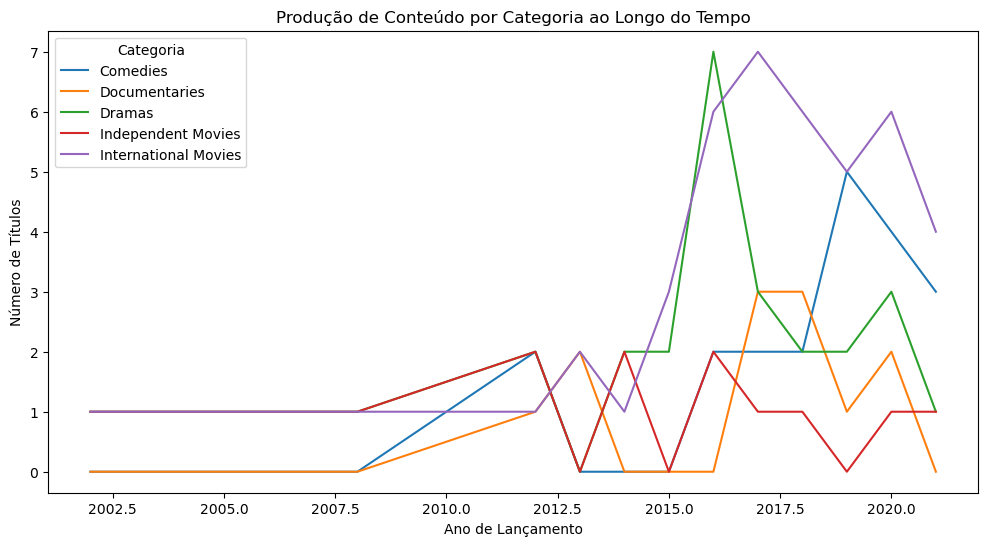

In [55]:
movies_grouped = top_movies.groupby(['release_year','listed_in']).size().unstack(fill_value=0)

movies_grouped.plot(kind='line', figsize=(12,6))
plt.title('Produção de Conteúdo por Categoria ao Longo do Tempo')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Número de Títulos')
plt.legend(title='Categoria')
plt.show()

In [53]:
movies_grouped

listed_in,Comedies,Documentaries,Dramas,Independent Movies,International Movies
release_year,,,,,
2002,0,0,1,1,1
2008,0,0,1,1,1
2012,2,1,2,2,1
2013,0,2,0,0,2
2014,0,0,2,2,1
2015,0,0,2,0,3
2016,2,0,7,2,6
2017,2,3,3,1,7
2018,2,3,2,1,6
